In [ ]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
import os
import gc

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter


from sklearn.preprocessing import LabelEncoder

from keras.models import Model
from keras.regularizers import l2
from keras.constraints import max_norm
from keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping
from keras.layers import Input, Dense, Dropout, Flatten, Activation
from keras.layers import Conv1D, Add, MaxPooling1D, BatchNormalization
from keras.layers import Embedding, Bidirectional, GlobalMaxPooling1D

# Loading data

**Loading data**

The Dataset contains these folders :
Random_split: Test | Dev | Train

If you use Google Colab : import the dataset in google drive.
Enable GPU in the notebook parameters 

data link : https://www.kaggle.com/googleai/pfam-seed-random-split


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!ls "/content/drive/Shareddrives/Test ID/Protein classification/random_split" # list the files under this directory


dev  random_split  test  train


In [ ]:
data_path = '/content/drive/Shareddrives/Test ID/Protein classification/random_split'
print('Available data', os.listdir(data_path))

Available data ['dev', 'random_split', 'train', 'test']


# Data exploration

**Data exploration**

The aim of this part is to make an observations of our data.
That's why we will vizualize our data.
We have to be sure that no data are missing. 


In [ ]:
def read_data(partition):
  data = []
  for fn in os.listdir(os.path.join(data_path, partition)):
    with open(os.path.join(data_path, partition, fn)) as f:
      data.append(pd.read_csv(f, index_col=None))
  return pd.concat(data)

In [ ]:
data1= read_data('train')
data1

,family_id,sequence_name,family_accession,aligned_sequence,sequence
0,Cation_ATPase_C,A0B648_METTP/704-874,PF00689.21,PAPLLALQILWINVVAEDFP.AIGLAVEPA.R...SGIMNE.RPR....,PAPLLALQILWINVVAEDFPAIGLAVEPARSGIMNERPRNPKEPIL...
1,DUF1635,U5GKL9_POPTR/18-237,PF07795.11,KTMDDLRNSLLYTTLELEQTKVAVQEELRKKDDQLFHLKDLLSKAI...,KTMDDLRNSLLYTTLELEQTKVAVQEELRKKDDQLFHLKDLLSKAI...
2,TGT,A5GIE9_SYNPW/12-370,PF01702.18,C..RHT.A....ARCGCFQT......PH.G.....P...VTTP.RF...,CRHTAARCGCFQTPHGPVTTPRFMPVGTLATVKGVTADQLATTGAQ...
3,HRM,Q9PWB7_DANRE/90-158,PF02793.22,VGVCVPEWDGL.ICWPQGFPGTLTKTPCPGYIYDFNHA...........,VGVCVPEWDGLICWPQGFPGTLTKTPCPGYIYDFNHAAHAYRRCDS...
4,Imm-NTF2-2,A4YMX6_BRASO/45-110,PF15631.6,TAARIAERYLAVHYPAFDTIAMPPIVDDEGD...VWKVSYELPPNM...,TAARIAERYLAVHYPAFDTIAMPPIVDDEGDVWKVSYELPPNMAGG...
...,...,...,...,...,...
13839,Tudor_1_RapA,A0A166MK03_9GAMM/3-53,PF18339.1,YKVGQRWVSQTEPKLGLGMISEIEGRRILITFPAADEIRTYATDQA...,YKVGQRWVSQTEPKLGLGMISEIEGRRILITFPAADEIRTYATDQA...
13840,DUF692,K9QH41_9NOSO/10-272,PF05114.13,GVGLGFREPFKSDLF...............LNRQQVDFLEIVAEHY...,GVGLGFREPFKSDLFLNRQQVDFLEIVAEHYLDVPVQKQQELEILA...
13841,Glycos_trans_3N,B8DTA1_BIFA0/7-69,PF02885.17,KSILTKLVQG.....N.HLTAEESEWFVDDL..MK.GN...........,KSILTKLVQGNHLTAEESEWFVDDLMKGNANPAAVGAVLATQQQLG...
13842,Elong-fact-P_C,B5GWZ5_STRC2/130-185,PF09285.11,VELVIAETEP.GVQG..DRS...........TG.G.TKPAKL.E.T...,VELVIAETEPGVQGDRSTGGTKPAKLETGYTVQVPLFITTGEKIKV...


In [ ]:
data2= read_data('test')
data2

,family_id,sequence_name,family_accession,aligned_sequence,sequence
0,GNAT_acetyltran,R6RQF6_9CLOT/17-251,PF12746.7,AFLFSGR..REVMAD....ACLQGMM..GCVYG..........TAG...,AFLFSGRREVMADACLQGMMGCVYGTAGGMDSAAAVLGDFCFLAGK...
1,MoaC,W5NKR5_LEPOC/505-640,PF01967.21,MVDVGGK.PVSRRTAAASATVLLG.EK..........AFWLV.......,MVDVGGKPVSRRTAAASATVLLGEKAFWLVKENQLAKGDALAVAQI...
2,Methyltransf_25,C0QLU8_DESAH/50-147,PF13649.6,VLDVACGT.C...D..VA...ME..AR.NQ.......T....G......,VLDVACGTCDVAMEARNQTGDAAFIIGTDFSPGMLTLGLQKLKKNR...
3,EMG1,T1G7Q2_HELRO/22-222,PF03587.14,VVLERASLESVKV..G.................KEYQLLN....CD...,VVLERASLESVKVGKEYQLLNCDRHKGIAKKFKRDISTCRPDITHQ...
4,Glyco_hydro_30C,C6VRM9_DYAFD/453-540,PF17189.4,GAVRVDVSGGLGTD...............AMVVSSYLN..TDKSLV...,GAVRVDVSGGLGTDAMVVSSYLNTDKSLVTVIVNADNQDRDISLAI...
...,...,...,...,...,...
12641,PKHD_C,A0A0U3E6Y4_9BURK/183-225,PF18331.1,DWQRHMLFELDQTIQRLRATLG.DNAETTTLTSHYHNLLRLWAE,DWQRHMLFELDQTIQRLRATLGDNAETTTLTSHYHNLLRLWAE
12642,DNA_pol3_delta2,D2NPK2_ROTMD/9-170,PF13177.6,IPADKLQQLRTDAAADRPTHAWLFTGATGAPHREAAKIFAAALLCE...,IPADKLQQLRTDAAADRPTHAWLFTGATGAPHREAAKIFAAALLCE...
12643,SBP_bac_5,Q82ZH6_ENTFA/81-464,PF00496.22,ATVPALAKDV...................K...ISDDGRKYHFTLR...,ATVPALAKDVKISDDGRKYHFTLREGIKWSNGEPITAQDFVYSWKK...
12644,GATase_3,COBQ_METKA/251-447,PF07685.14,RIAVIRLPRISNFT...DFEPLAMEPDVRVEFVD.PRDNLP........,RIAVIRLPRISNFTDFEPLAMEPDVRVEFVDPRDNLPEDADAVILP...


In [ ]:
data3= read_data('dev')
data3

,family_id,sequence_name,family_accession,aligned_sequence,sequence
0,zf-Tim10_DDP,N1QB11_PSEFD/15-76,PF02953.15,..RMEKKQMKDFMNMYSNLVQRCFNDCV...........TD.F......,RMEKKQMKDFMNMYSNLVQRCFNDCVTDFTSKSLQSKEEGCVMRCV...
1,DNA_primase_S,A8XA78_CAEBR/105-345,PF01896.19,FDID..LTDYDNIRNCCKEATVCPKCWKFMVLAVKILDFLLDDMFG...,FDIDLTDYDNIRNCCKEATVCPKCWKFMVLAVKILDFLLDDMFGFN...
2,Col_cuticle_N,A8XBM5_CAEBR/9-56,PF01484.17,ASAAILSGATIVGCLFFAAQIFNEVNSLYDDVMVDMDAFKVKSNIA...,ASAAILSGATIVGCLFFAAQIFNEVNSLYDDVMVDMDAFKVKSNIAWD
3,GST_C_3,W4XBU3_STRPU/120-207,PF14497.6,KD.................................KLKESLPKTVN...,KDKLKESLPKTVNPILLKFLEKALEDNPNGNGYFVGQDATMVEFVY...
4,Ada_Zn_binding,E8U5K2_DEIML/9-73,PF02805.16,DRWQAVVQRE...AAQ.DG...LFLYAVRTTGIYCRPSCPSRRPR....,DRWQAVVQREAAQDGLFLYAVRTTGIYCRPSCPSRRPRRENVTFFE...
...,...,...,...,...,...
12466,Mac,Q7NJL4_GLOVI/8-59,PF12464.8,KMLAGELYR.A.S.....D..........P....ELVALR.VSA.....,KMLAGELYRASDPELVALRVSARGLLALYNATEPGPGERRQQLLRE...
12467,DUF2461,H6MR07_GORPV/9-203,PF09365.10,AALDFYDDLE..IDNTKAF...........WTAH...............,AALDFYDDLEIDNTKAFWTAHKATYSSAVAEPMAALTADLAEEFGE...
12468,CutA1,B3LDD6_PLAKH/62-160,PF03091.15,IAVYVTAPGTDV.AEKI........SNVL..LEDKLASCVNIIPG....,IAVYVTAPGTDVAEKISNVLLEDKLASCVNIIPGVLSLYHWKGEIA...
12469,LacAB_rpiB,R5QL61_9FIRM/2-140,PF02502.18,IAIGSDHGGFDLKEAV....IA.HL.......KE...K.GY...E....,IAIGSDHGGFDLKEAVIAHLKEKGYEVKDVGCYDKSSCDYPVYGKA...


In [ ]:
data1.isnull().sum()

family_id           0
sequence_name       0
family_accession    0
aligned_sequence    0
sequence            0
dtype: int64

In [ ]:
data2.isnull().sum()

family_id           0
sequence_name       0
family_accession    0
aligned_sequence    0
sequence            0
dtype: int64

In [ ]:
data3.isnull().sum()

family_id           0
sequence_name       0
family_accession    0
aligned_sequence    0
sequence            0
dtype: int64

No data are missing so we can keep them.
Lets analyze the data.

In [ ]:
data2.groupby('family_accession').size().sort_values(ascending=False)

family_accession
PF13649.6     454
PF00560.33    240
PF13508.7     219
PF06580.13    192
PF02397.16    190
             ... 
PF12596.8       1
PF16318.5       1
PF12595.8       1
PF14948.6       1
PF05111.12      1
Length: 13071, dtype: int64

In [ ]:
data2.groupby('family_id').size().sort_values(ascending=False)

family_id
Methyltransf_25    454
LRR_1              240
Acetyltransf_7     219
His_kinase         192
Bac_transf         190
                  ... 
DUF5578              1
SRRM_C               1
SRX                  1
SSDP                 1
CodY                 1
Length: 13071, dtype: int64

In [ ]:
data1.groupby('family_accession').size().sort_values(ascending=False)

family_accession
PF13649.6     3637
PF00560.33    1927
PF13508.7     1761
PF06580.13    1537
PF02397.16    1528
              ... 
PF17601.2        1
PF17600.2        1
PF11570.8        1
PF17599.2        1
PF05550.11       1
Length: 17929, dtype: int64

In [ ]:
data3.groupby('family_accession').size().sort_values(ascending=False)

family_accession
PF13649.6     454
PF00560.33    240
PF13508.7     219
PF06580.13    192
PF02397.16    190
             ... 
PF12596.8       1
PF16318.5       1
PF12595.8       1
PF14948.6       1
PF05111.12      1
Length: 13071, dtype: int64

 Methyltransf_25 is the most common family

 **Protein classes and sequences**
'family_accession' can be used to predict the class of protein.
We can use them as labels for our multiclass classification of protein.
For the prediction, we will certainly 'sequence'as input.

*Aligned sequence is also a very important part of our data. It gives alot of informations about the structure of our protein, mutations,understanding the mechanisms of action of proteins, identification of similarities between the sequence of a first protein whose mechanism of action is known and that of a second protein whose mechanism of action is not known.

*We will use 'sequence' as input and not the 'aligned sequence' because computer power and available resources do not allow it.

*The number of classes 'Family_accession' is very high in training set
17929 and also in validation and test set (Dev and Test) 13071. The classes are also unbalanced. Some classes have only one 'family id' (protein) e.g(PF17601.2)
To avoid this problem, we can neglect these classes. Unbalanced data can distort our results. Therefore, we will select the number of classes according to the observations of some plots and the computer power.







In [ ]:
print("Number of unique classes in train set :", len(np.unique(data1.family_accession)))
print("Number of unique classes in dev set :", len(np.unique(data3.family_accession)))
print("Number of unique classes in test set :", len(np.unique(data2.family_accession)))


Number of unique classes in train set : 17929
Number of unique classes in dev set : 13071
Number of unique classes in test set : 13071


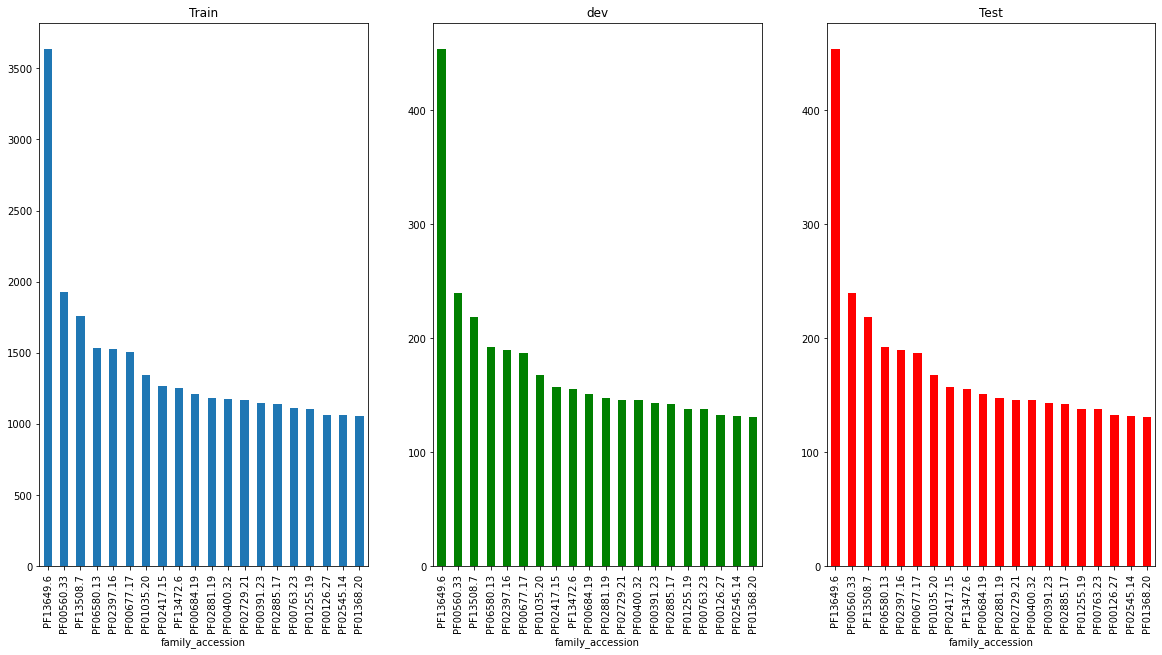

Plots of the most frequent family accessions and their counts


In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.title('Train')
data1.groupby('family_accession').size().sort_values(ascending=False).head(20).plot(kind='bar')
plt.subplot(1,3,2)
plt.title('dev')
data3.groupby('family_accession').size().sort_values(ascending=False).head(20).plot(kind='bar',color='g')
plt.subplot(1,3,3)
plt.title('Test')
data2.groupby('family_accession').size().sort_values(ascending=False).head(20).plot(kind='bar',color='red')
plt.show()
print('Plots of the most frequent family accessions and their counts')


**Classes**
Most of classes are les than 1000.

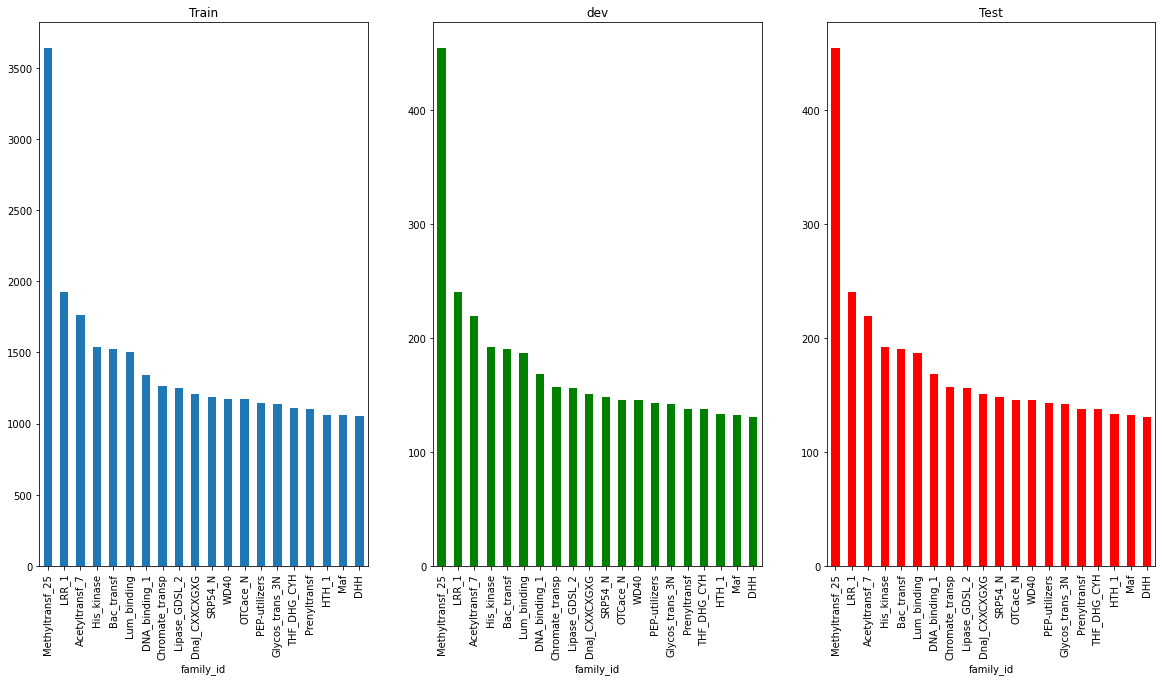

Plots of the most frequent family id and their counts


In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.title('Train')
data1.groupby('family_id').size().sort_values(ascending=False).head(20).plot(kind='bar')
plt.subplot(1,3,2)
plt.title('dev')
data3.groupby('family_id').size().sort_values(ascending=False).head(20).plot(kind='bar',color='g')
plt.subplot(1,3,3)
plt.title('Test')
data2.groupby('family_id').size().sort_values(ascending=False).head(20).plot(kind='bar',color='red')
plt.show()
print('Plots of the most frequent family id and their counts')


In [ ]:
 #Length of sequence in train data.
data1['characters_count_inseq']= data1['sequence'].apply(lambda x: len(x))
data2['characters_count_inseq']= data2['sequence'].apply(lambda x: len(x))
data3['characters_count_inseq']= data3['sequence'].apply(lambda x: len(x))

In [ ]:
def plot_seq_count(df, data_name):
  sns.distplot(df['characters_count_inseq'].values, kde=True, color="g")
  plt.title(f'Sequence char count: {data_name}')
  plt.grid(True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

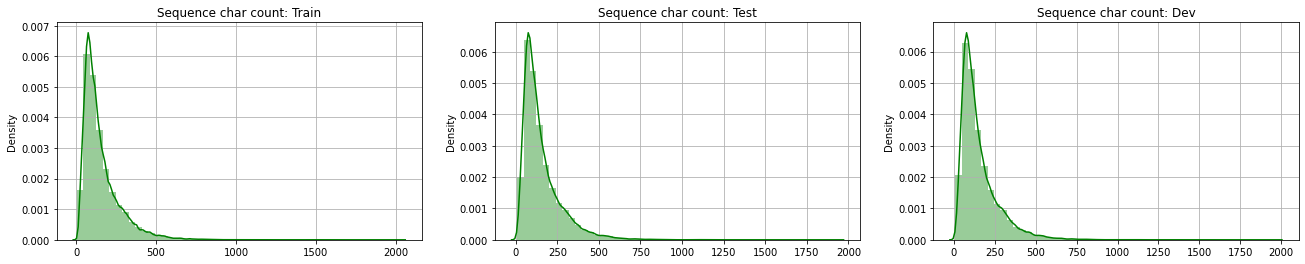

In [ ]:
plt.subplot(1, 3, 1)
plot_seq_count(data1, 'Train')

plt.subplot(1, 3, 2)
plot_seq_count(data2, 'Test')

plt.subplot(1, 3, 3)
plot_seq_count(data3, 'Dev')

plt.subplots_adjust(right=3.0)
plt.show()

**Sequences desnity**
The length of sequences in the datasets do not exceed 300 amino acids.
The length of the sequences (our input) should be  between 0 and 300. 
Accordin to this plot, we will fix the sequence_length to 100.
*If we had the ressources we can use the length of 250.

* These observations are the same for the 3 datasets (Train, Test, Dev)

In [ ]:
from collections import Counter
def aminoacid_frequency(df, name):
    df = df.apply(lambda x: " ".join(x))
    aminoacid = []
    for i in df: # concatination of all codes
        aminoacid.extend(i)
    aminoacid_dict= Counter(aminoacid)
    aminoacid_dict.pop(' ') # removing white space
    print(f'Aminoacid: {name}')
    print(f'Total unique aminoacid: {len(aminoacid_dict.keys())}')

    df = pd.DataFrame({'Aminoacid': list(aminoacid_dict.keys()), 'Freq': list(aminoacid_dict.values())})
    return df.sort_values('Freq', ascending=False).reset_index()[['Aminoacid', 'Freq']]

In [ ]:
train_aminoacid_freq = aminoacid_frequency(data1['sequence'], 'Train')
train_aminoacid_freq

Aminoacid: Train
Total unique aminoacid: 25


,Aminoacid,Freq
0,L,17062816
1,A,14384873
2,V,11913147
3,G,11845579
4,E,10859966
5,S,10597822
6,I,10234455
7,R,9406165
8,D,9371097
9,K,9127832


In [ ]:
test_aminoacid_freq = aminoacid_frequency(data2['sequence'], 'Test')
test_aminoacid_freq

Aminoacid: Test
Total unique aminoacid: 24


,Aminoacid,Freq
0,L,1967046
1,A,1668137
2,V,1380962
3,G,1375349
4,E,1251000
5,S,1210559
6,I,1184239
7,R,1085786
8,D,1078379
9,K,1045957


In [ ]:
dev_aminoacid_freq = aminoacid_frequency(data3['sequence'], 'Dev')
dev_aminoacid_freq

Aminoacid: Dev
Total unique aminoacid: 22


,Aminoacid,Freq
0,L,1967025
1,A,1667703
2,V,1382128
3,G,1376124
4,E,1249356
5,S,1210750
6,I,1185722
7,R,1085950
8,D,1080572
9,K,1047638


In [ ]:
def plot_aminoacid_frequency(df, data_name):
    plt.title(f'Aminoacid frequency: {data_name}')
    sns.barplot(x='Aminoacid', y='Freq', data=df)

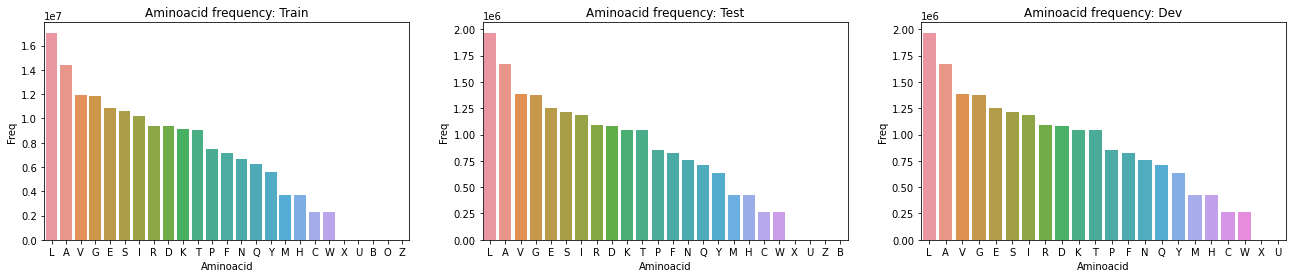

In [ ]:
plt.subplot(1, 3, 1)
plot_aminoacid_frequency(train_aminoacid_freq , 'Train')

plt.subplot(1, 3, 2)
plot_aminoacid_frequency(test_aminoacid_freq , 'Test')

plt.subplot(1, 3, 3)
plot_aminoacid_frequency(dev_aminoacid_freq , 'Dev')

plt.subplots_adjust(right=3.0)
plt.show()

**Aminoacid frequency**
We have a 24 unique amino acids.
the rarest amino acids are X, U, B, O, and Z.
The most common amino acid are L, A, V, G.
We will neglect the rarest amino acids for the multi class classification.
(We will drop X U B O and Z for training and test)

The 24 amino acids are present in the train, dev and test datasets.

**Choice of the number of classes**

We will choose 1000 classes (family_accession) due to limited ressources and also because most of classes have less than 1000 occurences according to https://colab.research.google.com/drive/1Uwfp3I8P5Z0r4T6bumA8-VciAmSVOnVW#scrollTo=qAtEn4X7MD9_&line=2&uniqifier=1.
Decreasing the number of classes from 17929 to 1000 (for training) and from 13026 to 1000 (for validation or test ).




In [ ]:
classes = data1['family_accession'].value_counts()[:1000].index.tolist()
len(classes)


1000

# Data preprocessing and preparation

**Data preprocessing and preparation**

*The input of our model is : Sequences (AVLAG...) that's why we need to transform them to numerical form. The numerical form is needed when we will use deep learning model of multi class protein classification. The letters can't be interpreted by deep learning models.
Each amino acid will be replaced by an integer (encoder). After that we will use an embedding vector with higher dimension. It will facilitate the work of the neural network of our deep learning model.

*The output is the class or 'family_accession'. The ourtput will be replaced by an integer (label encoder) then one hit encoded.


In [ ]:
train_data = data1.loc[data1['family_accession'].isin(classes)].reset_index()
test_data = data2.loc[data2['family_accession'].isin(classes)].reset_index()
dev_data = data3.loc[data3['family_accession'].isin(classes)].reset_index()
#Adapting data to the choice of 1000 classes

In [ ]:
print('The size of each dataset after considering 800 classes for each dataset:')
print('Train :', len(train_data))
print('Test :', len(test_data))
print('Dev :', len(dev_data))

The size of each dataset after considering 800 classes for each dataset:
Train : 439493
Test : 54378
Dev : 54378


In [ ]:
# Amino acids that will be encoded as an integer and then vectorised 
# through the embedding layer
amino_acid = ['L', 'A', 'V', 'G', 'E', 'S', 'I', 'R', 'D', 'K', 'T', 
               'P', 'F', 'N', 'Q', 'Y', 'M', 'H', 'C', 'W']
#we remove the rare amino acids U B O Z
def create_dict(amino_acid):
    char_dict = {}
    for index, val in enumerate(amino_acid):
        char_dict[val] = index+1
    return char_dict
char_dict = create_dict(amino_acid)
print(char_dict)
print("Dict Length:", len(char_dict))
#We will put them into a dictionnary with : keys: Amino acids and values

{'L': 1, 'A': 2, 'V': 3, 'G': 4, 'E': 5, 'S': 6, 'I': 7, 'R': 8, 'D': 9, 'K': 10, 'T': 11, 'P': 12, 'F': 13, 'N': 14, 'Q': 15, 'Y': 16, 'M': 17, 'H': 18, 'C': 19, 'W': 20}
Dict Length: 20


In [ ]:
def one_hot_encoding(df):
  encode_list = []
  for row in df['sequence'].values:
   row_encode = []
   for code in row:
    row_encode.append(char_dict.get(code, 0))
   encode_list.append(np.array(row_encode))
  
  return encode_list
  #Encodes  sequence to integer values using the dictionnary of aminoacis
  #20 amino acids acids are taken into consideration
  #Return a list of integers
   

In [ ]:
train_encode = one_hot_encoding(train_data) 
test_encode = one_hot_encoding(test_data) 
dev_encode = one_hot_encoding(dev_data)

In [ ]:
# padding sequences to have an uniform datasets

max_length = 100
train_pad = pad_sequences(train_encode, maxlen=max_length, padding='post', truncating='post')
test_pad = pad_sequences(test_encode, maxlen=max_length, padding='post', truncating='post')
dev_pad = pad_sequences(dev_encode, maxlen=max_length, padding='post', truncating='post')

train_pad.shape, test_pad.shape, dev_pad.shape


((439493, 100), (54378, 100), (54378, 100))

In [ ]:
# One hot encoding of sequences
train_ohe = to_categorical(train_pad)
test_ohe = to_categorical(test_pad)
dev_ohe = to_categorical(dev_pad)

train_ohe.shape, test_ohe.shape, dev_ohe.shape

((439493, 100, 21), (54378, 100, 21), (54378, 100, 21))

In [ ]:
#Labelencoder the output
le = LabelEncoder()

y_train_le = le.fit_transform(train_data['family_accession'])
y_test_le = le.transform(test_data['family_accession'])
y_dev_le = le.transform(dev_data['family_accession'])

y_train_le.shape, y_test_le.shape, y_dev_le.shape

((439493,), (54378,), (54378,))

In [ ]:
print('Total classes: ', len(le.classes_))
# le.classes_

Total classes:  1000


In [ ]:
# One hot encoding of outputs
y_train = to_categorical(y_train_le)
y_test = to_categorical(y_test_le)
y_dev = to_categorical(y_dev_le)

y_train.shape, y_test.shape, y_dev.shape

((439493, 1000), (54378, 1000), (54378, 1000))

# Classification and Model evaluation

**Classification**

*Objective* : Realize the multiclass protein classification.
Prediction of the class "family accession" of a protein given its sequence of amino acids (Sequence length: 100).

* To do we will use a deep learning model. We will choose Long short-term memory (LSTM) (an artificial recurrent neural network (RNN)). We choosed that model because we need a model which takes into account the chronological order of amino acids (For exemples LVA and LAV are different). That's why LSTM is used. This model can keep his memory the information that he saw recently.

* The sequences will first be encoded using a dictionnary of the 20 amino acids retained during the data analysis, then embedded as 128-dimensional vectors. The LSTM output will be then be passed into a Dense layer. The final predictions will be a 1000-dimensional vector representing the probability the sequence belongs to each of the 1000 families. 
We will use Softmax as activation function and Categorical_crossentropy as loss function for backpropagation.
For the training we will use train_pad data (padding= make data uniform)
For the test or validation (dev and train data).
We will use dropout layer to avoid overfitting problems.

* In the end we will evaluate the model by calculating the accuracy and the loss of the model (scores)


In [ ]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Bidirectional

In [ ]:
import os
import gc

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from prettytable import PrettyTable
from IPython.display import Image

from sklearn.preprocessing import LabelEncoder

from keras.models import Model
from keras.regularizers import l2
from keras.constraints import max_norm
from keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping
from keras.layers import Input, Dense, Dropout, Flatten, Activation
from keras.layers import Conv1D, Add,
from keras.layers import Embedding, Bidirectional, GlobalMaxPooling1D

In [ ]:
# Input for variable-length sequences of integers
num_of_classes = 1000
embedding_vecor_length =128
num_aminoacid= 21
max_length=100


x_input = Input(shape=(100,))
emb = Embedding(21, 128, input_length=max_length)(x_input)
bi_rnn = Bidirectional(LSTM(64, kernel_regularizer=l2(0.01), recurrent_regularizer=l2(0.01), bias_regularizer=l2(0.01)))(emb)
x = Dropout(0.3)(bi_rnn)

# softmax classifier

x_output = tf.keras.layers.Dense(1000, activation='softmax')(x)

model1 = Model(inputs=x_input, outputs=x_output)
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model1.summary()





Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 100)]             0         
_________________________________________________________________
embedding_7 (Embedding)      (None, 100, 128)          2688      
_________________________________________________________________
bidirectional_15 (Bidirectio (None, 128)               98816     
_________________________________________________________________
dropout_14 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 1000)              129000    
Total params: 230,504
Trainable params: 230,504
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Early Stopping training is stopped if the evaluation loss is considerably increasing
es = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

In [ ]:
history = model1.fit(train_pad, y_train, validation_data=(test_pad, dev_pad), epochs=50, batch_size=250, callbacks=[es])



Epoch 1/50
1756/1758 [============================>.] - ETA: 0s - loss: 6.9600 - accuracy: 0.0443

ValueError: ignored

I had an issue in running the model. I tried to fix. I think its a problem of version (In this version and according to my search in Stack Overflow, Dense layer is not compatible with LSTM layer)

In [ ]:
score = model.evaluate(test_pad, y_test, batch_size=70, verbose=0)
print('Accuracy: {0:.0%}'.format(score[1]/1))
print("Loss: %.4f\n" % score[0])

# Tracage de l'accuracy et de la loss function
plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label = 'Model : training accuracy')
plt.plot(history.history['val_accuracy'], label = 'Model : test accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.title('Loss')
plt.plot(history.history['loss'], label = 'Model : training loss')
plt.plot(history.history['val_loss'], label = 'Model : test loss')
plt.legend()

# Perspectives and next steps

* Using aligned sequences instead of unaligned sequences to allow a better study of the functions and structures of the proteins. Aligned sequences can allow us to identify mutations, similarities between proteins, discover new functions of proteins using other proteins with same structure. We can also elucidate mechanisms of proteins implicated in diseases (incurable, cancer...)

* Work with all classes instead of 1000 for better multi class classification

* Experiment with different lengths of embeddings vectors for the protein sequences.

* Investigate and verify if there exists any relationship between the biological properties of a protein family captured by our models.

* Computational modeling and analysis of protein structures (docking, protein design, protein structure prediction) after validation the multi class classification.

* Use another model and compare it with LSTM model (like ProtCNN)




# Report produced by **Khalil BEN RAYANA**